In [1]:
import os
os.chdir('../') # this insures we can use the models folder as a python module 
# Any figures saved or data pickled in the current working directly will be saved up one folder from here.
import pybamm
import models
import numpy as np
import matplotlib.pyplot as plt

# First we simulate the Marinescu et al. (2016) model

In [2]:
model = models.ZeroD_Marinescu_type()

In [3]:
experiment = pybamm.Experiment(['Discharge at 1.7 A for 1.95 hours'])

sim = pybamm.Simulation(
    model=model,
    experiment=experiment,
    solver=pybamm.CasadiSolver(
        atol=1e-6,
        rtol=1e-6,
        #dt_max = .01,
        #extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)

In [4]:
sim.solve()

The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.


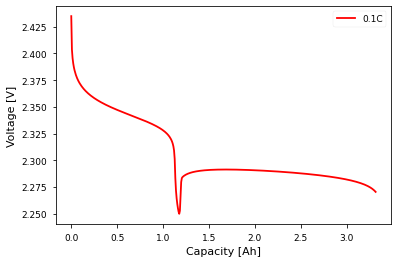

In [5]:
capacity = sim.solution['Capacity [Ah]'].entries
V = sim.solution["Terminal voltage [V]"].entries
plt.plot(capacity, V)

plt.legend(["0.1C",])
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]');